# Content Based Movie Recommendation System

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignoring all warnings:
warnings.filterwarnings('ignore')

## 1) Reading Data

### For this project we are only concerned with two files in our dataset that are <i>u.data</i> and <i>u.item</i>. <br> <br>These files are $TSV (Tab\ Separated\ Values)$ files and can be read using the <i>.read_csv</i> method by giving the separator as tab(\t)

In [24]:
# "u.data" has no colum headers and hence we have to provide the column headers
# Column headers can be found in the information document about this dataset (README.md)

columns_1 = ["User ID", "Movie ID", "Rating", "Timestamp"]
user_ratings = pd.read_csv("Datasets/ml-100k/u.data", sep="\t", names=columns_1)

print("Shape: {}".format(user_ratings.shape))
user_ratings.head()

Shape: (100000, 4)


,User ID,Movie ID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### We have no use of timestamp as it doesn't matter if the user rated the movie just after it was released or did it 6 months later, so we will remove the last column

In [12]:
# We can see how many users and items we have:
print("Number of users: {}".format(user_ratings["User ID"].nunique()))
print("Number of movies: {}".format(user_ratings["Item ID"].nunique()))

# We can calculate unique values using len(np.unique(list)), eg: len(np.unique(data["User ID"]))

Number of users: 943
Number of movies: 1682


### We will load <i>u.item</i> dataframe to map movie name to movie id

In [14]:
columns_2 = ["Movie ID", "Movie Title", "Release Date", "Video Release Date", "IMDB URL", "Unknown", "Action", "Adventure", 
           "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
           "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

# "u.item" file is separtated by pipe("|") character instead of tab hence we will use pipe as a separator
movie_info = pd.read_csv("Datasets/ml-100k/u.item", sep="\|", names=columns_2)

print("Shape: {}".format(movie_info.shape))
movie_info.head()

Shape: (1682, 24)


,Movie ID,Movie Title,Release Date,Video Release Date,IMDB URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### We will only use two columns ("Movie ID", "Movie Title") from this dataframe as we have to map movie id to movie titles and combine them in one dataframe

In [25]:
user_ratings = pd.merge(user_ratings, movie_info[["Movie ID", "Movie Title"]], on="Movie ID")
# We can merge two dataframes just like two sql tables by specifying the foreign key, in our case it is "Movie ID"

print("Shape: {}".format(user_ratings.shape))
user_ratings.head()

Shape: (100000, 5)


,User ID,Movie ID,Rating,Timestamp,Movie Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## 2) Exploratory Data Analysis

### In this section we will analyse the data and reshape it in the right format to use it for further mathematical operations

In [27]:
# 1) First we will extract the average rating of all the movies
# 2) We will group our data by "Movie Title" with mean of ratings as an additional column

user_ratings.groupby(by="Movie Title").mean()

,User ID,Movie ID,Rating,Timestamp
Movie Title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [30]:
# 1) As we only need Rating column we will discard the unwanted columns and on the contrary mean of columns like "User ID", 
# "Movie ID", etc in itself doesn't make any sense

# 2) After groupping we will sort our data in descending order of ratings

user_ratings.groupby(by="Movie Title").mean()["Rating"].sort_values(ascending=False)

Movie Title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: Rating, Length: 1664, dtype: float64

### After sorting the data we can see that some movies have recieved a perfect rating of 5 stars which in real life scenerio is not possible and even if it possible then it is not a very reliable rating. <br><br> Eg: If one or two people rate a movie as 5 starts then the average rating will also be 5 stars but this rating won't be very reliable as not many people gave their opinions on it, hence <font color=green><i>We need to also consider the number of ratings for a movie and not just it's average rating, just like tf-idf vectorization in nlp for importance of a word</i></font>

In [32]:
# We will form a dataset of movie titles adn their average rating
titles = pd.DataFrame(user_ratings.groupby(by="Movie Title").mean()["Rating"])
titles.rename(columns={'Rating':'Avg Rating'}, inplace=True) # Renaming the column name
titles.head()

,Avg Rating
Movie Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [36]:
# Now we can add a new column for "Num of Ratings" to our "titles" dataframs which will have the count/number of ratings that 
# each review has recieved

titles["Num of Rating"] = user_ratings.groupby(by="Movie Title").count()["Rating"]
titles.head()

,Avg Rating,Num of Rating
Movie Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


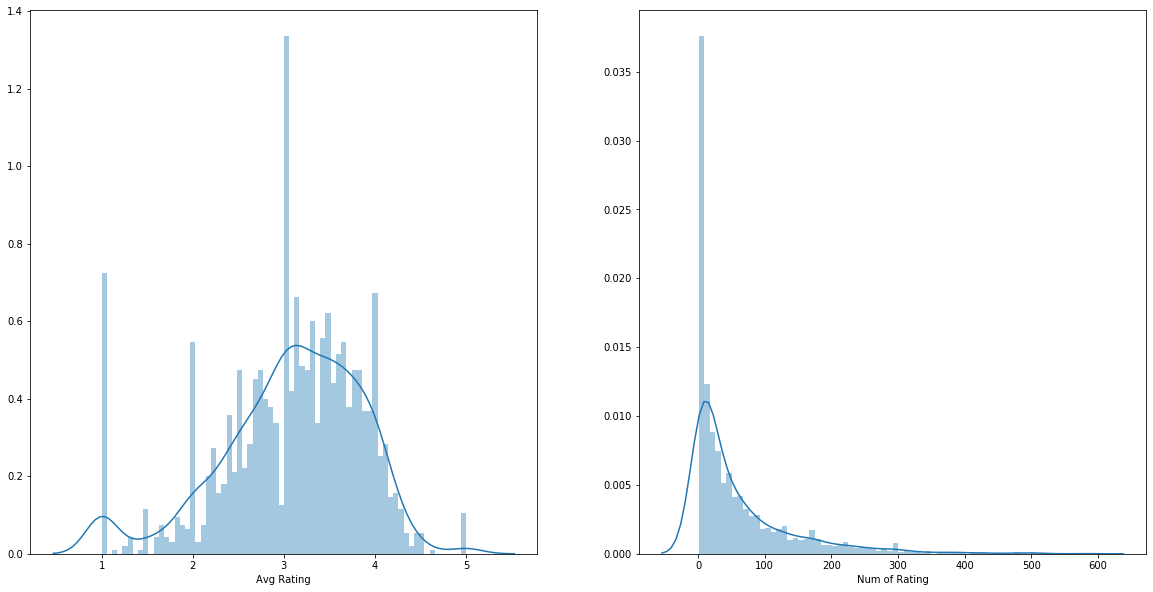

In [44]:
# We will form a histogram of average ratings & number of ratings to understand our data in depth

fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.distplot(titles["Avg Rating"], bins=70, ax=axs[0])
sns.distplot(titles["Num of Rating"], bins=70, ax=axs[1])
fig.show()

### From the $Avg\ Rating$ graph we can see most of the ratings lie around 3 starts and if we see this graph we can see that it forms a normal distributiona nd if we would have had more examples in our dataset a more perfect normal distribution would have been visible, i.e. all real life scenerios are somewhat a gaussian normal distribution
### From the $Num\ of\ Rating$ Graph we can see that most of the reviews lie in the fisr or second bins that is $most\ movies\ got\ on\ average\ reviews\ from\ 10\ to\ 20\ people$ and these are still not very reliable ratins as number of reviewers are very less

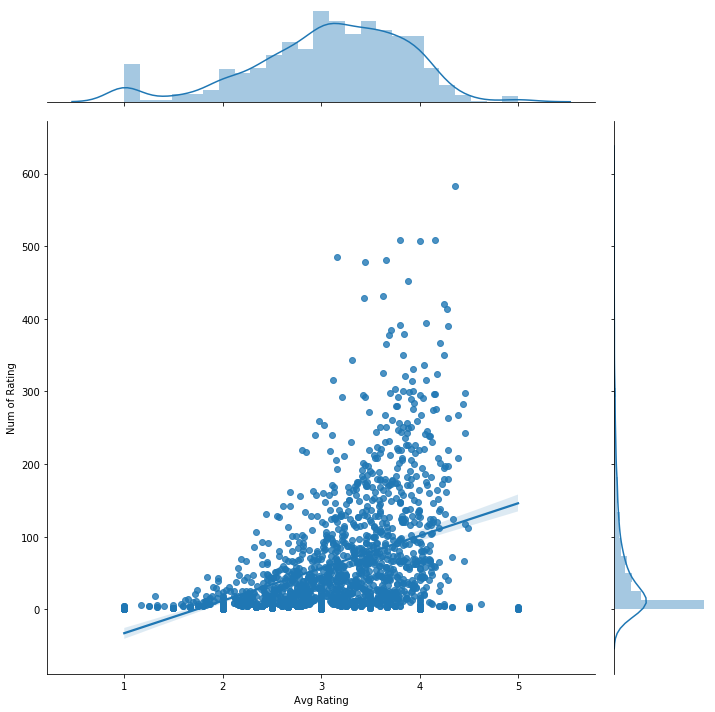

In [46]:
# We will now use a joint plot to see the relation between average rating vs number of ratings
sns.jointplot(x="Avg Rating", y="Num of Rating", data=titles, kind="reg", height=10)

### We can see that there is a positive linear relation between these two features and the distribution is somewhat a gaussian Normal Distribution

## 3) Predicting Recommendations using Correlation

In [129]:
# First we will reshape our dataframe to something more useful, User IDs as rows && Movie titles as features/columns and 
# ratings to fill data, for each cell where a user hasn't rated a specific movie NaN will be filled automatically

movie_matrix = user_ratings.pivot_table(index="User ID", columns="Movie Title", values="Rating")
movie_matrix.head(10)

Movie Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### As an example we will take "Stars Wars (1977)" as sample movie and first extract it's user ratings basically the whole column and get it's correlation with the whole matrix (column wise, axis=0) <br><br> Basically taking correlation column-wise will give a value in the range [-1, 1] that corresponds to mean of how much similar or dissimilar a user's rating is for that movie given that the user rated Star Wars (1977) too

In [130]:
starwars_user_ratings = movie_matrix["Star Wars (1977)"]
starwars_user_ratings.head()

User ID
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [131]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])
corr_starwars.head(10)

,Correlation
Movie Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [132]:
corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
Movie Title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


### As we can see we are getting a lot of movies with correlation as 1, that is perfect correlation but practically speaking on the movie itself should have perfect correlation <br><br>Example:<br><br>If <i>Hollow Reed</i> was only rated by 6 users and all of them gave it 5 stars, and the same users also rated <i>Star Wars</i> and gave it 5 stars then it will give a perfect correlation for both movies <br>But this doesn't mean that this correlation holds it's place so we will use a filtering system to get good recommendations

### 1) We can either use the number of ratings as a filter and set a threshold for it. So only the movies that have number of ratings greater than the threshold will pass as recommendation
### 2) We can multiply $\frac{Number\ of\ Ratings}{Total\ Users\ who\ gave\ ratings}$ with the calculated correlation and get final correlation value

In [133]:
# Using method 1:

# First we have to join "Num of Rating" column with our corr_starwars dataframe

corr_starwars = corr_starwars.join(titles["Num of Rating"])
corr_starwars

,Correlation,Num of Rating
Movie Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [134]:
# We have to remove all the NaN values, NaN values in this case means that out of all the users that rated for that movie,
# they also rated for starwars in a similar fashion with not much standard deviation & hence they are useless for us

corr_starwars.dropna(inplace=True)
print(corr_starwars.shape)
corr_starwars.head()

# Hence our data has reduced to 1410 movies

(1410, 2)


,Correlation,Num of Rating
Movie Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [143]:
# We will set the threshold of legit number of ratings as 100 and then see our results:
corr_starwars[corr_starwars["Num of Rating"]>100].sort_values("Correlation", ascending=False)

,Correlation,Num of Rating
Movie Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


### Now we can see that we are getting some legit recommendations as the only movie with perfect correlation is Star Wars itself

## 4) Predict Function

In [161]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=["Correlation"])
    corr_movie = corr_movie.join(titles["Num of Rating"])
    corr_movie.dropna(inplace=True)
    
    if movie_name not in corr_movie[corr_movie["Num of Rating"]>100].sort_values("Correlation", ascending=False).index[:10]:
        predictions = list(corr_movie[corr_movie["Num of Rating"]>100].sort_values("Correlation", ascending=False).index[:10])
        
    else:
        predictions = list(corr_movie[corr_movie["Num of Rating"]>100].sort_values("Correlation", ascending=False).index[:11])
        predictions.remove(movie_name)
        
    return predictions

In [162]:
# Testing Function:
predict_movies("Star Wars (1977)")

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)',
 'Sting, The (1973)',
 'Indiana Jones and the Last Crusade (1989)',
 'Pinocchio (1940)',
 'Frighteners, The (1996)',
 'L.A. Confidential (1997)',
 'Wag the Dog (1997)']